# A brief guide to FIt-SNE. Visualizing MNIST

Author: Dmitry Kobak

In [1]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns
sns.set_style('ticks')

# the path should point to the FIt-SNE directory
import sys; sys.path.append('../')
from fast_tsne import fast_tsne

In [2]:
# Load MNIST data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float') / 255
x_test  =  x_test.reshape(10000, 784).astype('float') / 255
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
print(X.shape)

# Do PCA and keep 50 dimensions
X = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X, full_matrices=False)
X50 = np.dot(U, np.diag(s))[:,:50]

# 10 nice colors
col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

Using TensorFlow backend.


(70000, 784)


In [22]:
# Running t-SNE on the full MNIST in the default way (this uses perplexity=30)

%time Z = fast_tsne(X50, seed=42)

CPU times: user 706 ms, sys: 60.3 ms, total: 766 ms
Wall time: 52.4 s


<IPython.core.display.Javascript object>


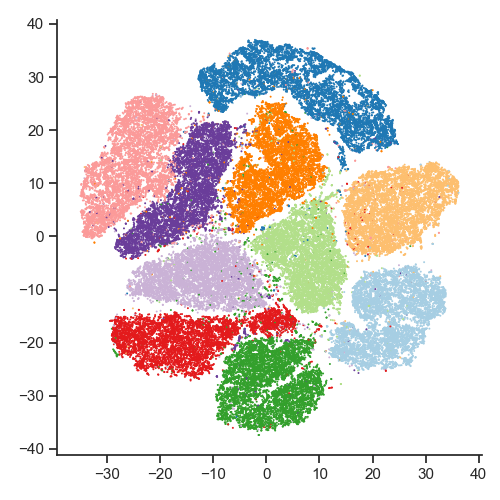

In [24]:
plt.figure(figsize=(5,5))
plt.axis('equal')
plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
sns.despine()
plt.tight_layout()

It is almost always a good idea to use PCA initialization

And for large datasets it is always a good idea to increase the learning rate. Here we use 1000, but for even larger data sets n/12 is a good choice. 

See here for discussion: https://www.nature.com/articles/s41467-019-13056-x.

In [25]:
# With PCA initialization and high learning rate

PCAinit = X50[:,:2] / np.std(X50[:,0]) * 0.0001
%time Z = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)

CPU times: user 763 ms, sys: 76 ms, total: 839 ms
Wall time: 1min 14s


<IPython.core.display.Javascript object>


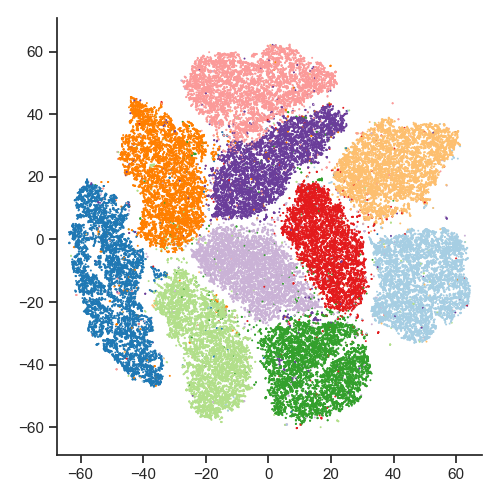

In [26]:
plt.figure(figsize=(5,5))
plt.axis('equal')
plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
sns.despine()
plt.tight_layout()

## Changing the random seed used for initialization

In [39]:
%time Z1 = fast_tsne(X50, seed=1)
%time Z2 = fast_tsne(X50, seed=2)

CPU times: user 697 ms, sys: 60.3 ms, total: 757 ms
Wall time: 56.9 s
CPU times: user 708 ms, sys: 60.2 ms, total: 768 ms
Wall time: 58.7 s


<IPython.core.display.Javascript object>


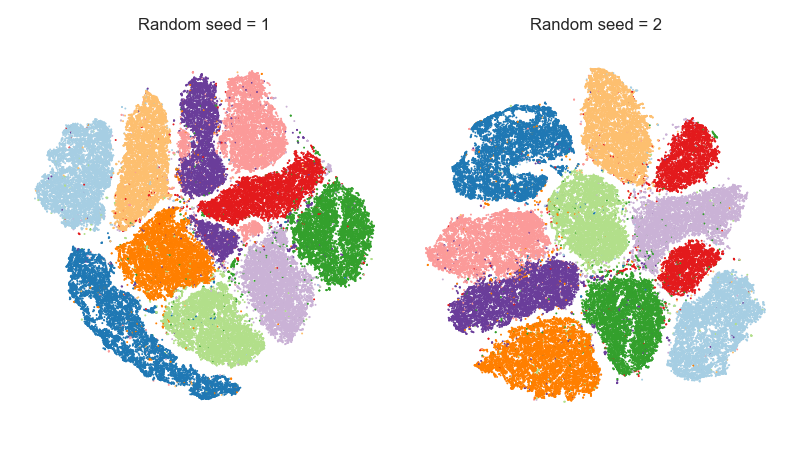

In [41]:
plt.figure(figsize=(8, 4.5))
for i, (Z,title) in enumerate(zip([Z1,Z2], ['Random seed = 1', 'Random seed = 2'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

Note how clusters sometimes get split into multiple subclusters. This can be fixed by increasing the learning rate, as shown below for the same random seeds.

In [71]:
%time Z1 = fast_tsne(X50, seed=1, learning_rate=1000)
%time Z2 = fast_tsne(X50, seed=2, learning_rate=1000)

CPU times: user 707 ms, sys: 72.5 ms, total: 780 ms
Wall time: 1min 18s
CPU times: user 686 ms, sys: 84.1 ms, total: 770 ms
Wall time: 1min 23s


<IPython.core.display.Javascript object>


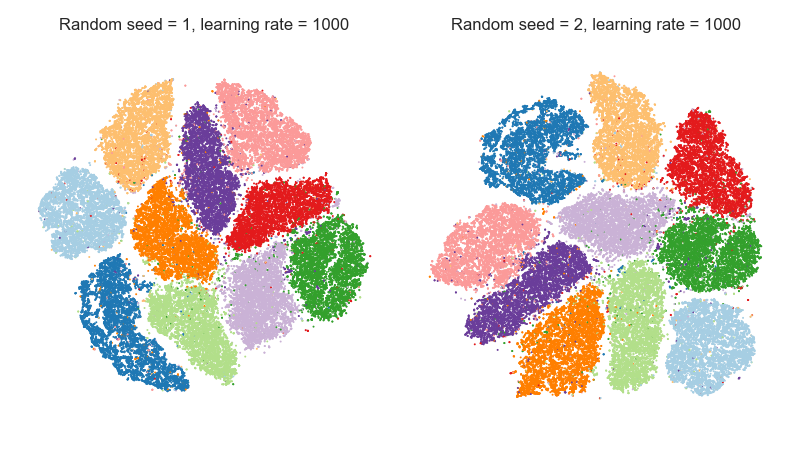

In [72]:
plt.figure(figsize=(8, 4.5))
for i,(Z,title) in enumerate(zip([Z1,Z2], ['Random seed = 1, learning rate = 1000', 
                                           'Random seed = 2, learning rate = 1000'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## Changing perplexity

In [35]:
%time Z1 = fast_tsne(X50, perplexity=3,   initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, perplexity=300, initialization=PCAinit, learning_rate=1000)

CPU times: user 723 ms, sys: 60.2 ms, total: 783 ms
Wall time: 1min 22s
CPU times: user 686 ms, sys: 84.6 ms, total: 771 ms
Wall time: 6min 22s


<IPython.core.display.Javascript object>


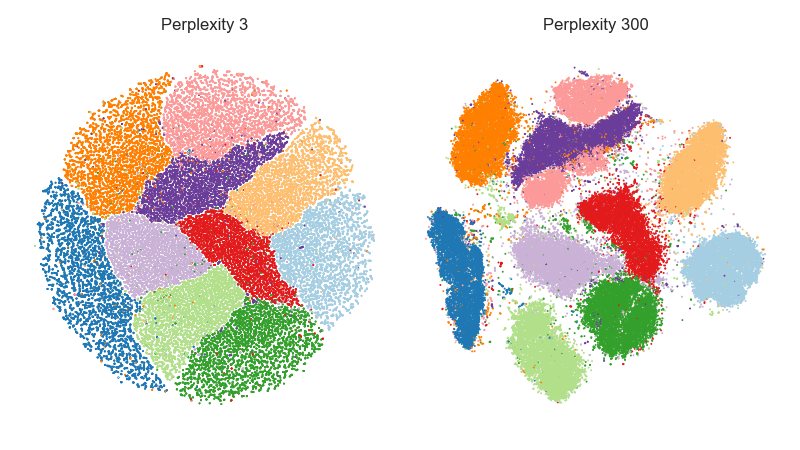

In [36]:
plt.figure(figsize=(8, 4.5))
for i,(Z,title) in enumerate(zip([Z1,Z2], ['Perplexity 3', 'Perplexity 300'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## Exaggeration
Exaggeration is applied after the early exaggeration phase is over. By default, early exaggeration lasts 250 iterations, with coefficient 12.

In [29]:
%time Z1 = fast_tsne(X50, learning_rate=1000, initialization=PCAinit, late_exag_coeff=2, start_late_exag_iter=250)
%time Z2 = fast_tsne(X50, learning_rate=1000, initialization=PCAinit, late_exag_coeff=4, start_late_exag_iter=250)

CPU times: user 676 ms, sys: 100 ms, total: 777 ms
Wall time: 58.3 s
CPU times: user 715 ms, sys: 87.9 ms, total: 803 ms
Wall time: 58.5 s


<IPython.core.display.Javascript object>


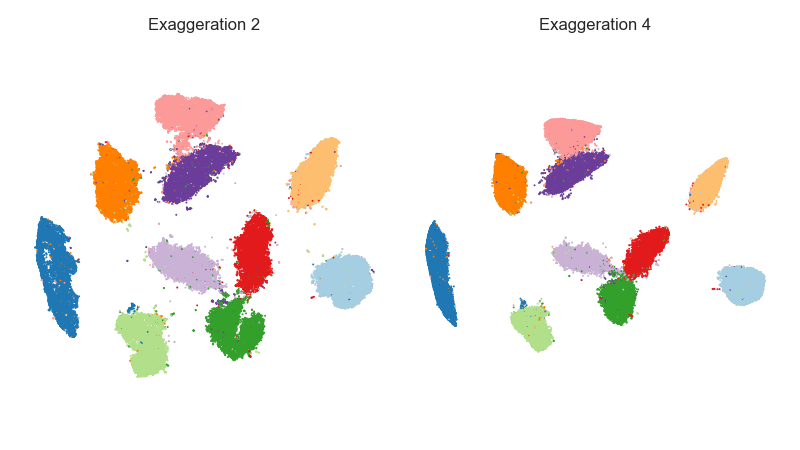

In [32]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['Exaggeration 2', 'Exaggeration 4'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## Making the kernel more/less heavy-tailed
The default Cauchy kernel corresponds to `df=1`. Large `df` corresponds to the Gaussian kernel.

See https://ecmlpkdd2019.org/downloads/paper/327.pdf

In [49]:
%time Z1 = fast_tsne(X50, learning_rate=1000, initialization=PCAinit, df=100)
%time Z2 = fast_tsne(X50, learning_rate=1000, initialization=PCAinit, df=.5)

CPU times: user 726 ms, sys: 83.9 ms, total: 810 ms
Wall time: 1min 5s
CPU times: user 698 ms, sys: 64.4 ms, total: 762 ms
Wall time: 1min 23s


<IPython.core.display.Javascript object>


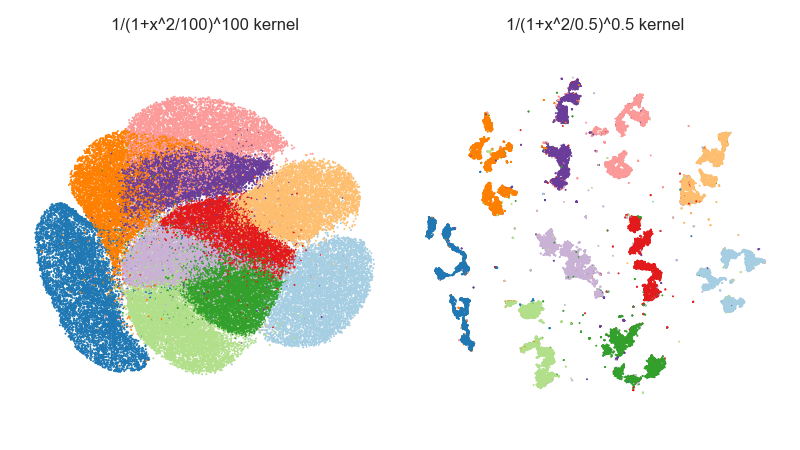

In [50]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['1/(1+x^2/100)^100 kernel',
                                           '1/(1+x^2/0.5)^0.5 kernel'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## 1-dimensional embedding

In [51]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, map_dims=1)

CPU times: user 692 ms, sys: 92.1 ms, total: 784 ms
Wall time: 1min 15s
CPU times: user 648 ms, sys: 84.3 ms, total: 732 ms
Wall time: 34.3 s


<IPython.core.display.Javascript object>


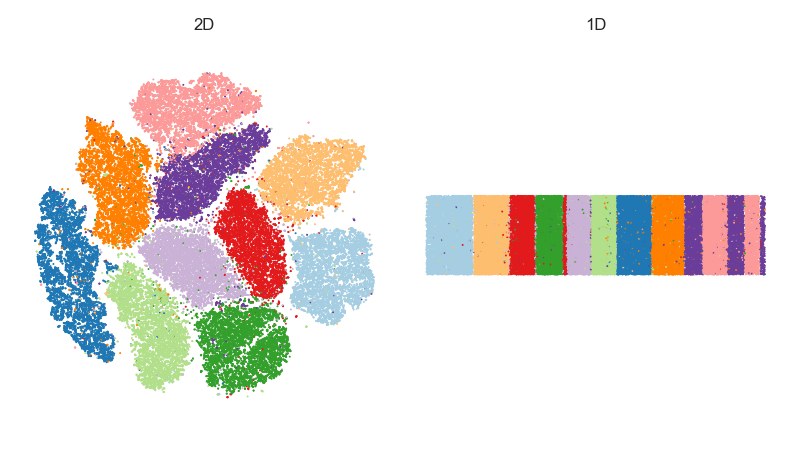

In [52]:
plt.figure(figsize=(8,4.5))
plt.subplot(121)
plt.axis('equal')
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=2, edgecolors='none')
plt.xticks([])
plt.yticks([])
plt.title('2D')

plt.subplot(122)
plt.scatter(Z2[:,0], np.random.uniform(size=Z2.shape[0]), c=col[y], s=2, edgecolors='none')
plt.ylim([-2,3])
plt.xticks([])
plt.yticks([])
plt.title('1D')

sns.despine(left=True, bottom=True)
plt.tight_layout()

## 1D embeddings with different output kernels

In [3]:
%%time

dfs = [100, 10, 1, .5, .2, .1, .05]
Zs = []
PCAinit1D = X50[:,:1] / np.std(X50[:,0]) * 0.0001
for df in dfs:
    Z = fast_tsne(X50, learning_rate=1000, initialization=PCAinit1D, map_dims=1, df=df)
    Zs.append(Z)

CPU times: user 4.62 s, sys: 551 ms, total: 5.18 s
Wall time: 4min 41s


<IPython.core.display.Javascript object>


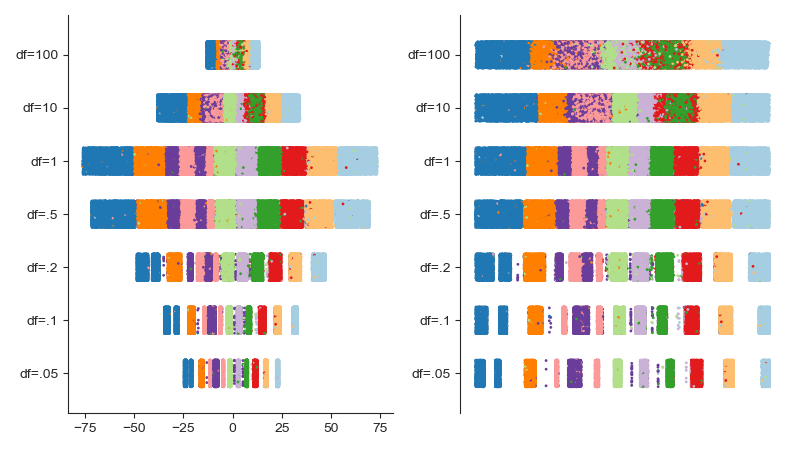

In [5]:
plt.figure(figsize=(8,4.5))
ax1 = plt.subplot(121)
for i,(df,Z) in enumerate(zip(dfs,Zs)):
    plt.scatter(Z[:,0], np.random.uniform(size=Z.shape[0])/2-i, c=col[y], s=1)
plt.ylim([-6.5,1])
plt.yticks(np.array([-6,-5,-4,-3,-2,-1,0])+.25, ['df=.05','df=.1','df=.2','df=.5','df=1','df=10','df=100'])

ax2 = plt.subplot(122)
for i,(df,Z) in enumerate(zip(dfs,Zs)):
    plt.scatter((Z[:,0]-np.min(Z))/(np.max(Z)-np.min(Z)), np.random.uniform(size=Z.shape[0])/2-i, c=col[y], s=1)
plt.ylim([-6.5,1])
plt.yticks(np.array([-6,-5,-4,-3,-2,-1,0])+.25, ['df=.05','df=.1','df=.2','df=.5','df=1','df=10','df=100'])
# plt.yticks([])
plt.xticks([])

sns.despine(ax=ax1)
sns.despine(ax=ax2, bottom=True)

plt.tight_layout()

## Fixed sigma instead of perplexity

In [53]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, sigma=10, K=10)

CPU times: user 718 ms, sys: 80 ms, total: 798 ms
Wall time: 1min 15s
CPU times: user 700 ms, sys: 60.2 ms, total: 760 ms
Wall time: 57.6 s


<IPython.core.display.Javascript object>


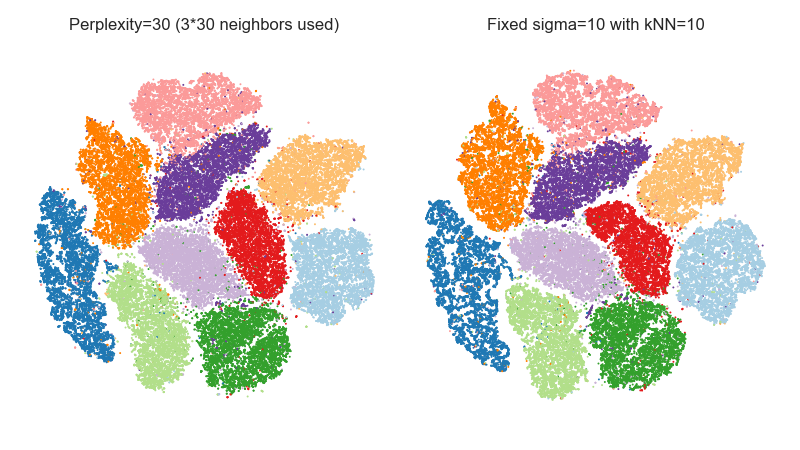

In [54]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['Perplexity=30 (3*30 neighbors used)',
                                           'Fixed sigma=10 with kNN=10'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## Perplexity combination
Is not useful for MNIST, but can be useful in other cases, see https://www.nature.com/articles/s41467-019-13056-x.

In [55]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, perplexity_list=[3,30,300], initialization=PCAinit, learning_rate=1000)

CPU times: user 744 ms, sys: 64.2 ms, total: 808 ms
Wall time: 1min 16s
CPU times: user 715 ms, sys: 56.2 ms, total: 771 ms
Wall time: 7min 7s


<IPython.core.display.Javascript object>


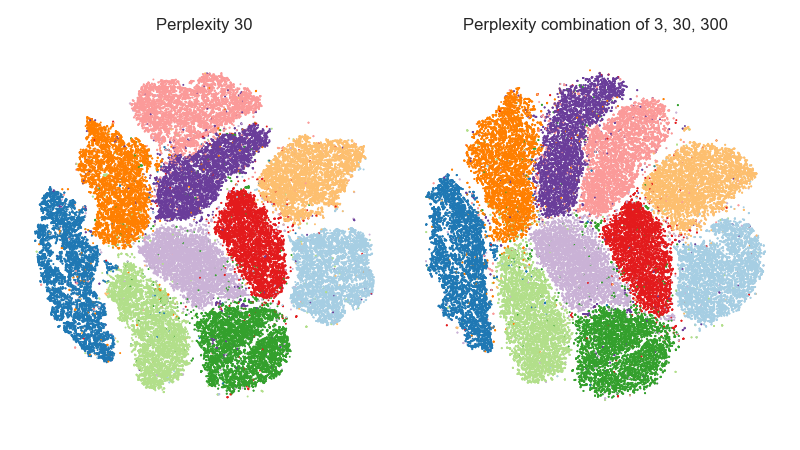

In [57]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['Perplexity 30',
                                           'Perplexity combination of 3, 30, 300'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## VP tree vs ANNOY for kNN search

In [58]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, knn_algo='vp-tree')

CPU times: user 690 ms, sys: 92 ms, total: 783 ms
Wall time: 1min 20s
CPU times: user 768 ms, sys: 67.4 ms, total: 835 ms
Wall time: 2min 41s


<IPython.core.display.Javascript object>


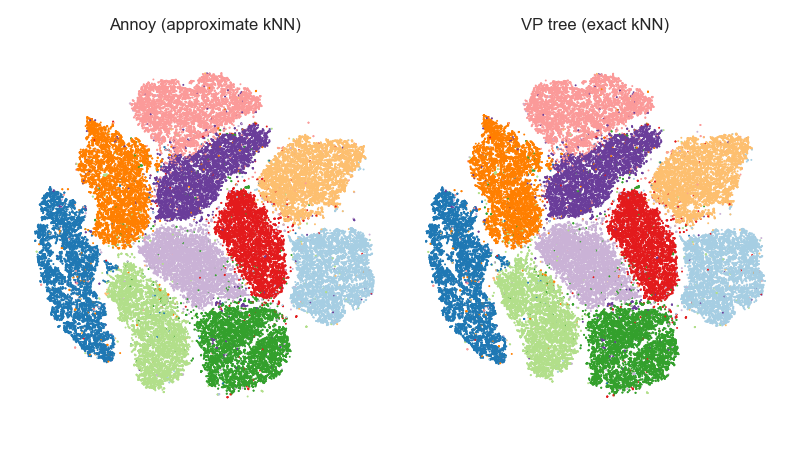

In [59]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['Annoy (approximate kNN)',
                                           'VP tree (exact kNN)'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## Barnes-Hut vs FFT to approximate repulsive forces during gradient descent 
Using a subsampled dataset here, to speed up Barnes-Hut.

In [60]:
# Subsampling 

np.random.seed(42)
ind10k = np.random.choice(X.shape[0], 10000, replace=False)

%time Z1 = fast_tsne(X50[ind10k,:], initialization=PCAinit[ind10k,:])
%time Z2 = fast_tsne(X50[ind10k,:], initialization=PCAinit[ind10k,:], nbody_algo='Barnes-Hut')

CPU times: user 607 ms, sys: 47.6 ms, total: 654 ms
Wall time: 31.2 s
CPU times: user 622 ms, sys: 36.2 ms, total: 658 ms
Wall time: 3min 7s


<IPython.core.display.Javascript object>


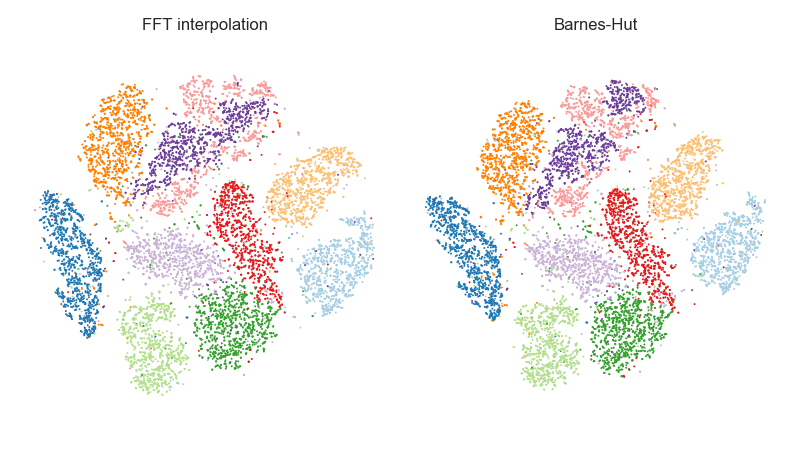

In [61]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['FFT interpolation',
                                           'Barnes-Hut'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y[ind10k]], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## Exact t-SNE

In [62]:
# Subsampling 

np.random.seed(42)
ind2k = np.random.choice(X.shape[0], 2000, replace=False)

%time Z1 = fast_tsne(X50[ind2k,:], initialization=PCAinit[ind2k,:])
%time Z2 = fast_tsne(X50[ind2k,:], initialization=PCAinit[ind2k,:], theta=0)

CPU times: user 6.04 ms, sys: 64.2 ms, total: 70.3 ms
Wall time: 24.4 s
CPU times: user 11.4 ms, sys: 20.1 ms, total: 31.6 ms
Wall time: 2min 44s


<IPython.core.display.Javascript object>


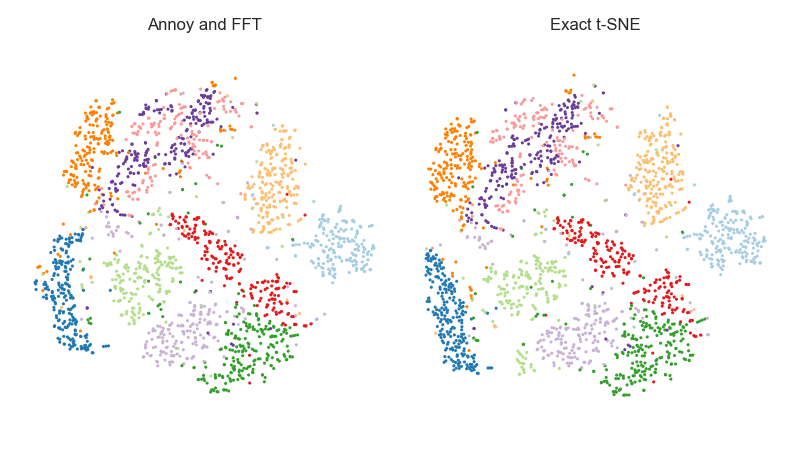

In [65]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['Annoy and FFT', 'Exact t-SNE'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y[ind2k]], s=5, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## Loading and saving input similarities

In [66]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, load_affinities = 'save')
%time Z2 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, load_affinities = 'load')

CPU times: user 696 ms, sys: 60.2 ms, total: 756 ms
Wall time: 1min 20s
CPU times: user 698 ms, sys: 60.2 ms, total: 758 ms
Wall time: 1min 11s


<IPython.core.display.Javascript object>


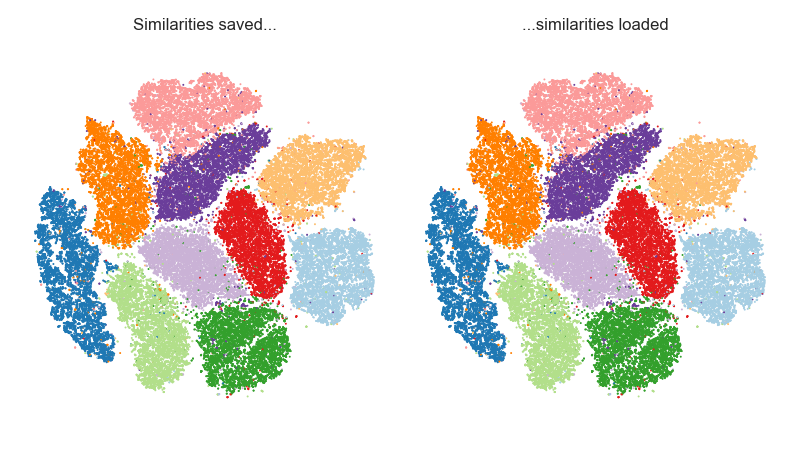

In [67]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['Similarities saved...', '...similarities loaded'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()

In [68]:
# And now for the exact t-SNE

%time Z1 = fast_tsne(X50[ind2k,:], initialization=PCAinit[ind2k,:], theta=0, load_affinities = 'save')
%time Z2 = fast_tsne(X50[ind2k,:], initialization=PCAinit[ind2k,:], theta=0, load_affinities = 'load')

CPU times: user 11.2 ms, sys: 40.3 ms, total: 51.5 ms
Wall time: 2min 30s
CPU times: user 11 ms, sys: 20.1 ms, total: 31.2 ms
Wall time: 2min 22s


<IPython.core.display.Javascript object>


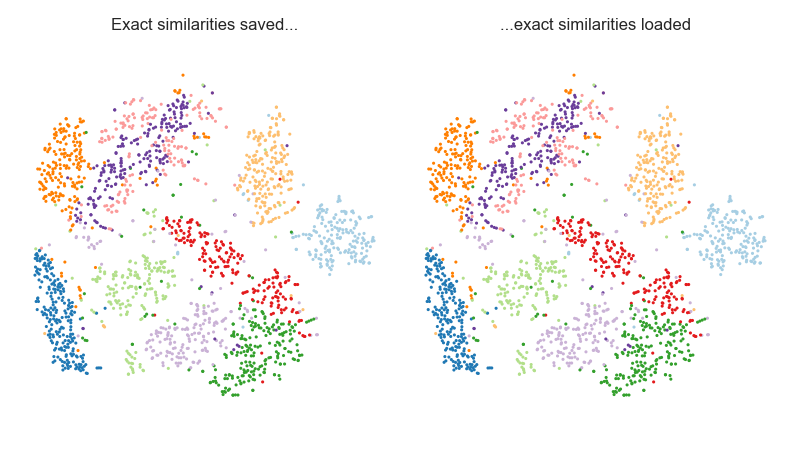

In [70]:
plt.figure(figsize=(8, 4.5))

for i,(Z,title) in enumerate(zip([Z1,Z2], ['Exact similarities saved...', '...exact similarities loaded'])):
    plt.subplot(1,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], c=col[y[ind2k]], s=5, edgecolors='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

sns.despine(left=True, bottom=True)
plt.tight_layout()